Retsil sale Report dasebode

In [3]:
# the project is : Retail sale report dasebode
import numpy as np
import pandas as pd



read data 


In [4]:
df=pd.read_excel(r"C:\Users\Himanshu Kumar\Downloads\online_retail_II.xlsx\online_retail_II.xlsx")


#explore and understand data
# 1 viwe top row


In [5]:
print(df.head())


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


2 get info and status


In [6]:
print(df.info())
print(df.describe()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None
            Quantity                    InvoiceDate          Price  \
count  525461.000000                         525461  525461.000000   
mean       10.337667  2010-06-28 11:37:36.845017856       4.688834   
min     -9600.000000            2009-12-01 07:45:00  -53594.360000   
25%         1.000000   

3 check for messing value


In [7]:
print(df.isnull().sum())    


Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


prepear and clean the data

remove messing value


In [8]:
df=df.dropna(subset=['Quantity','Price'])


Remove negetive or zero

In [9]:
df=df[df['Quantity']>0]

convert columns as nessery

In [10]:
df[' InvoiceDate']=pd.to_datetime(df["InvoiceDate"])

use numpy for core analytic

In [11]:
#convert pandas columan as numpy array
import numpy as np
Quantitys=df['Quantity'].to_numpy()
Prices=df['Price'].to_numpy()

Perform Calculation with numpy


In [12]:
# total sale
total_sale=np.sum(Quantitys*Prices)
print(total_sale)

10169713.573999997


create total_sale columen 

In [13]:
df['total_sale']=df['Quantity']*df['Price']

statistic calculation

In [14]:
mean_price=np.mean(Prices)
std_deviation=np.std(Quantitys)
print(mean_price)
print(std_deviation)

3.973446488740779
92.97454489455592


Analyze data for  business insight

Analyze top selling prodect

In [15]:
# top prodect by Quentety sale
top_prodect=df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# top prodect by total sale

top_sale=df.groupby('Description')['total_sale'].sum().sort_values(ascending=False)
print(top_prodect.head(10))
print(top_sale.head(10))



Description
WHITE HANGING HEART T-LIGHT HOLDER    58793
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55202
BROCADE RING PURSE                    48384
PACK OF 72 RETRO SPOT CAKE CASES      46755
ASSORTED COLOUR BIRD ORNAMENT         45356
60 TEATIME FAIRY CAKE CASES           36502
PACK OF 60 PINK PAISLEY CAKE CASES    31940
JUMBO BAG RED RETROSPOT               30807
SMALL POPCORN HOLDER                  29824
STRAWBERRY CERAMIC TRINKET BOX        27128
Name: Quantity, dtype: int64
Description
Manual                                 262992.08
REGENCY CAKESTAND 3 TIER               170078.51
WHITE HANGING HEART T-LIGHT HOLDER     160630.78
DOTCOM POSTAGE                         116408.71
ASSORTED COLOUR BIRD ORNAMENT           73092.99
PAPER CHAIN KIT 50'S CHRISTMAS          58189.25
JUMBO BAG RED RETROSPOT                 56595.51
PARTY BUNTING                           49682.72
POSTAGE                                 49477.54
ROTATING SILVER ANGELS T-LIGHT HLDR     47985.09
Name: total_sale,

Time treand analysis

In [16]:
df['Month']=df['InvoiceDate'].dt.to_period('M')
month_sale=df.groupby('Month')['Quantity'].sum()
print(month_sale)

Month
2009-12    445861
2010-01    396087
2010-02    392763
2010-03    531689
2010-04    387241
2010-05    425348
2010-06    415541
2010-07    359616
2010-08    522803
2010-09    594108
2010-10    624378
2010-11    733705
2010-12    182448
Freq: M, Name: Quantity, dtype: int64


Vizvalize your findings

Create charts with matplotlib

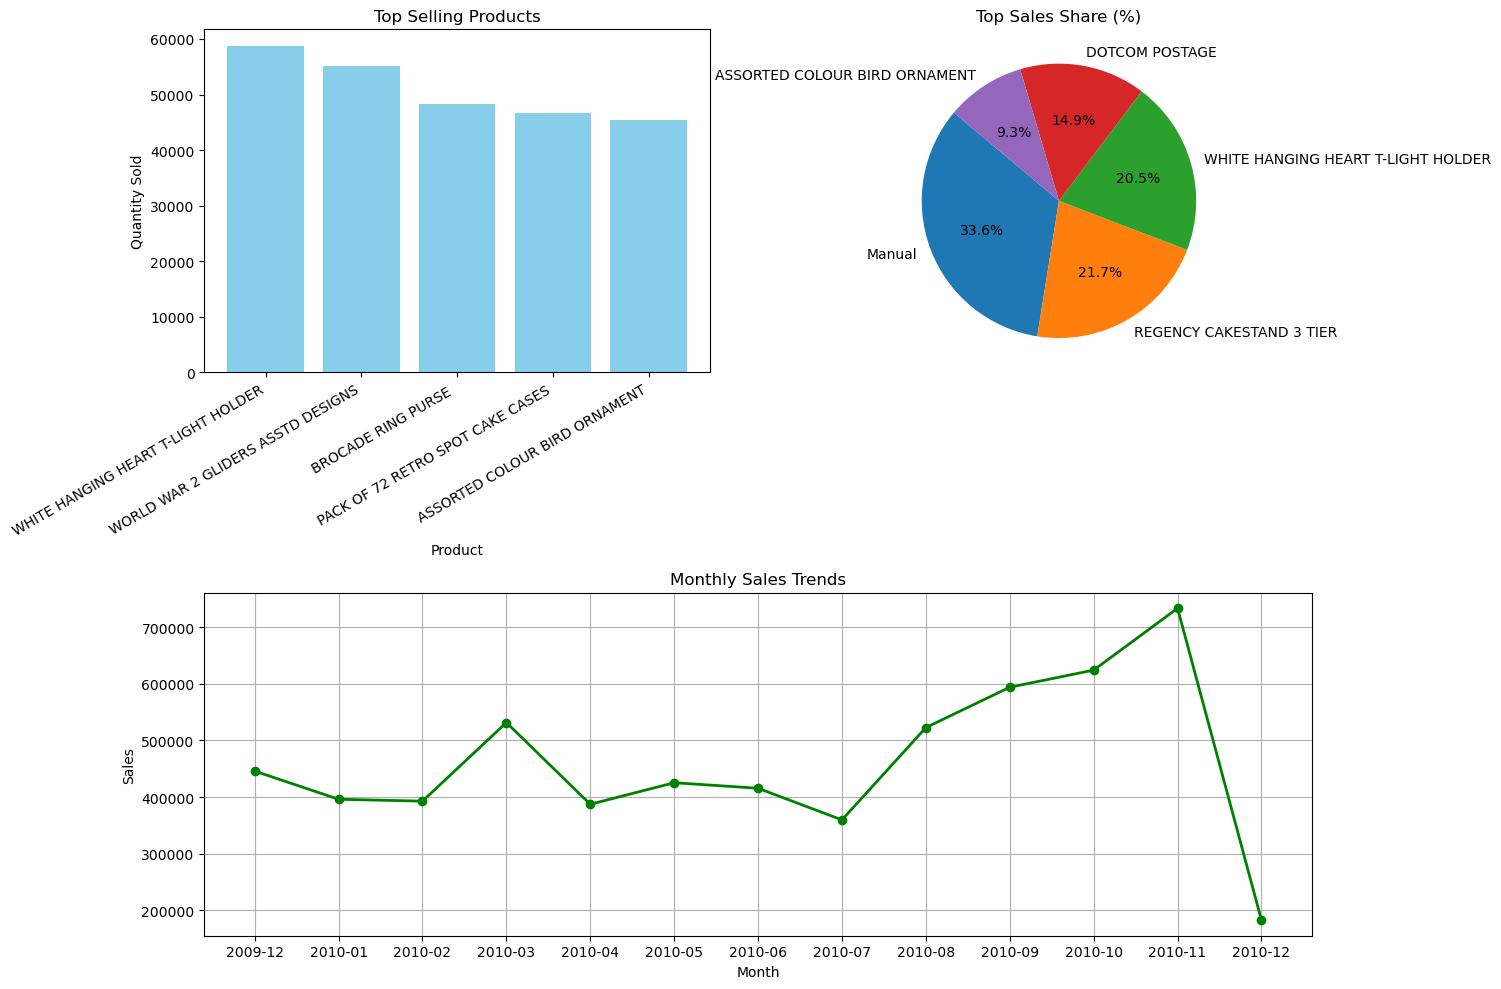

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Top selling products by Quantity (Bar Chart)
plt.subplot(2, 2, 1)
plt.bar(top_prodect.head(5).index, top_prodect.head(5).values, color='skyblue')
plt.title("Top Selling Products")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=30, ha='right', fontsize=10)  # Rotate and align x labels

# Top sale amount (Pie Chart)
plt.subplot(2, 2, 2)
plt.pie(top_sale.head(5).values, labels=top_sale.head(5).index, autopct='%1.1f%%', startangle=140)
plt.title("Top Sales Share (%)")

# Monthly Sale Trends (Line Chart)
plt.subplot(2, 1, 2)
months = list(month_sale.index.astype(str))
sales = list(month_sale.values)
plt.plot(months, sales, marker='o', color='green', linewidth=2)
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)

# Layout adjustment
plt.tight_layout()
plt.show()

In this chart we understand 

1. Top Selling Products (Bar Chart)
The “WHITE HANGING HEART T-LIGHT HOLDER” is your best-selling product by quantity, with nearly 60,000 units sold.

Other top products include “WORLD WAR 2 GLIDERS ASSTD DESIGNS”, “BROCADE RING PURSE”, “PACK OF 72 RETRO SPOT CAKE CASES”, and “ASSORTED COLOUR BIRD ORNAMENT”.

The steep drop from first to fifth place suggests a small group of products drives most unit sales.

2. Top Sales Share (%) (Pie Chart)
The pie chart highlights the market share of each top product in percentage terms.

“REGENCY CAKESTAND 3 TIER” (21.7%) and “WHITE HANGING HEART T-LIGHT HOLDER” (20.5%) have nearly equal, largest shares among individual products.

Manual sales (33.6%) cover a broader segment than any individual product—these could be walk-ins, offline orders, or bulk category sales.

The distribution is fairly balanced between several products, but a few dominate.

3. Monthly Sales Trends (Line Chart)
Sales vary month to month, showing a clear upward trend from July 2010 onward, peaking in November 2010 at over 700,000 units.

A dramatic drop occurs in December 2010, possibly due to year-end effects, inventory issues, or recording cutoffs.

The growth from July to November could indicate seasonal effects, successful marketing, or increased demand.

Business Insights
A few products drive most sales—focusing marketing and inventory on these could maximize revenue.

Seasonal spikes suggest the importance of planning for high-demand months (like November).

The sharp drop in December needs investigation—could reveal missed sales opportunities.

The large proportion of “Manual” sales signals an opportunity to analyze what makes these unique or to automate and improve their recording.

Summary: Your business is product-driven with clear seasonality. Focus on bestsellers, investigate seasonal peaks and dips, and optimize “Manual” sales tracking for further growth and clarity.